In [15]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [16]:
import matplotlib.pyplot as plt

In [17]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [19]:
# Print the first 10 labels before OHE
print("First 10 labels in y_train:\n", y_train[:10])

First 10 labels in y_train:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [20]:
# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
# Print the first 10 labels after OHE
print("First 10 labels in y_train:\n", y_train[:10])


First 10 labels in y_train:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [22]:
# Display some sample images with labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 
               'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

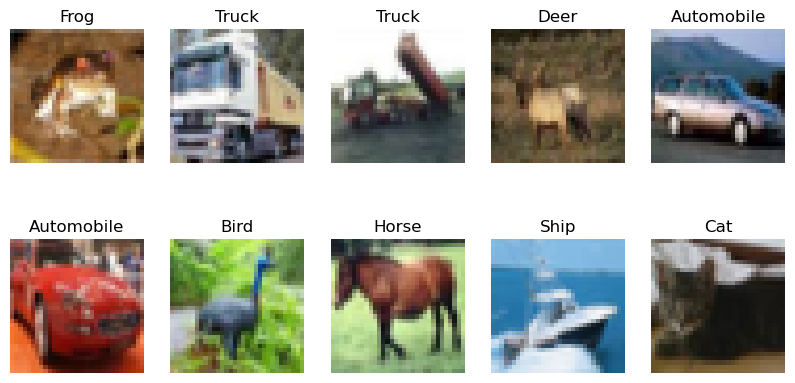

In [23]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(32, 32,3)) 
    plt.title(class_names[int(y_train[i].argmax())])
    plt.axis('off')
plt.show()

In [24]:
# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Display the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3312 - loss: 1.8048 - val_accuracy: 0.5255 - val_loss: 1.3166
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5487 - loss: 1.2684 - val_accuracy: 0.5983 - val_loss: 1.1307
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6097 - loss: 1.1070 - val_accuracy: 0.6195 - val_loss: 1.0759
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6499 - loss: 1.0023 - val_accuracy: 0.6523 - val_loss: 0.9862
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6770 - loss: 0.9241 - val_accuracy: 0.6299 - val_loss: 1.0586
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7009 - loss: 0.8639 - val_accuracy: 0.6764 - val_loss: 0.9129
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7166 - loss: 0.8093 - val_accuracy: 0.6993 - val_loss: 0.8625
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7359 - loss: 0.7548 - 

In [28]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 1s - 4ms/step - accuracy: 0.7159 - loss: 0.8465
Test accuracy: 0.72


## To further optimise the CNN model for better performance, you can apply the following strategies:

### 1. Data Augmentation

Data augmentation increases the diversity of training data, reducing overfitting and helping the model generalise better.

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  # Randomly rotate images
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
)

datagen.fit(x_train)

# Train the model using augmented data
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
  3/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7118 - loss: 0.9656

c:\Users\hussa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6706 - loss: 0.9441 - val_accuracy: 0.7043 - val_loss: 0.8742
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6803 - loss: 0.9101 - val_accuracy: 0.6869 - val_loss: 0.9278
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6900 - loss: 0.8863 - val_accuracy: 0.7183 - val_loss: 0.8355
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6966 - loss: 0.8702 - val_accuracy: 0.7257 - val_loss: 0.7883
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7002 - loss: 0.8544 - val_accuracy: 0.7209 - val_loss: 0.8346
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7034 - loss: 0.8390 - val_accuracy: 0.7271 - val_loss: 0.8033
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7111 - loss: 0.8279 - val_accuracy: 0.7437 - val_loss: 0.7633
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7163 - loss: 0.8098 - val_accurac

In [31]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 1s - 4ms/step - accuracy: 0.7320 - loss: 0.8009
Test accuracy: 0.73


### 2. Add More Layers

You can increase the depth of the CNN by adding more convolutional layers, ensuring the model can learn more complex features. Be cautious of overfitting and increase model capacity gradually.

In [32]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\hussa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train the model
model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.2972 - loss: 1.8664 - val_accuracy: 0.5265 - val_loss: 1.3121
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5743 - loss: 1.1952 - val_accuracy: 0.6389 - val_loss: 1.0168
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6575 - loss: 0.9569 - val_accuracy: 0.6835 - val_loss: 0.9126
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7156 - loss: 0.8020 - val_accuracy: 0.6815 - val_loss: 0.9424
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7538 - loss: 0.6995 - val_accuracy: 0.7196 - val_loss: 0.8274
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7783 - loss: 0.6251 - val_accuracy: 0.7353 - val_loss: 0.7910
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8034 - loss: 0.5585 - val_accuracy: 0.7508 - val_loss: 0.7329
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8270 - loss: 0.4896 - 

In [35]:
# Evaluate the model on test data
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 2s - 7ms/step - accuracy: 0.7430 - loss: 0.8370
Test accuracy: 0.74


### 2b. Increasing convolution sizes and adding more Layers further

In [36]:
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),  #increased conv size
    layers.Conv2D(64, (3, 3), activation='relu'),                           #increased conv size
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  #additionally added layer
    layers.Dense(64, activation='relu'),  #additionally added layer
    layers.Dense(10, activation='softmax')
])


In [37]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Train the model
model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
 29/782 ━━━━━━━━━━━━━━━━━━━━ 1:04 86ms/step - accuracy: 0.7045 - loss: 0.8427

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

### 2c.Train the improved Architecture On the Augmented Data 

In [ ]:
# Train the improved model on the augmented data
model2.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30, validation_data=(x_test, y_test))

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

## Repeat increasing no of filters in convolutional layers or no. of convolutional layers 

## 3. Regularisation

To avoid overfitting, apply regularisation techniques like dropout and L2 weight regularisation.

Dropout: Randomly drops a fraction of neurons during training.

L2 Regularisation: Penalises large weights, encouraging simpler models.

In [ ]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Drop 50% of neurons
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

## 4. Optimise Hyperparameters


Use hyperparameter tuning techniques like Grid Search or Random Search to experiment with:

Learning rate: Start with 1e-3 and tune (e.g., 1e-2, 1e-4).
Batch size: Try values like 32, 64, 128.
Number of filters: Start small (e.g., 32) and increase for deeper layers.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    return lr * 0.9 if epoch > 5 else lr

callback = LearningRateScheduler(lr_schedule)
model.fit(x_train, y_train, epochs=30, callbacks=[callback], validation_data=(x_test, y_test))


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")